In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data_dir = "C:/Users/Blanc/DataScientist/StatisticalTesting/src/data/"

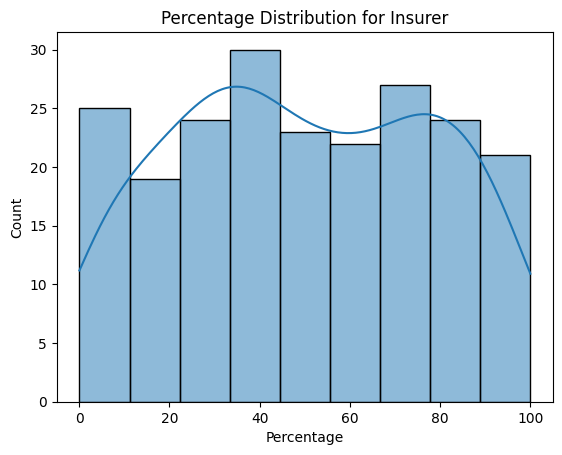

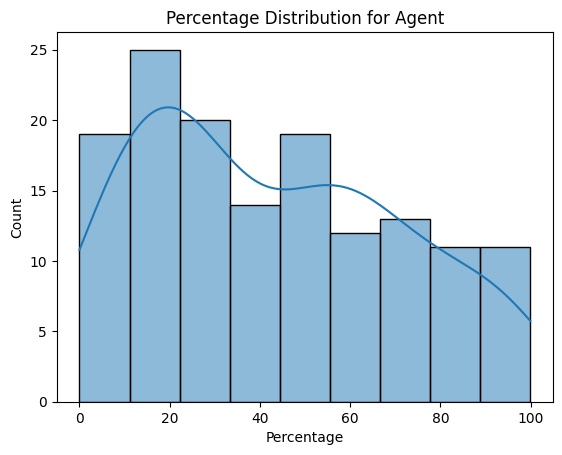

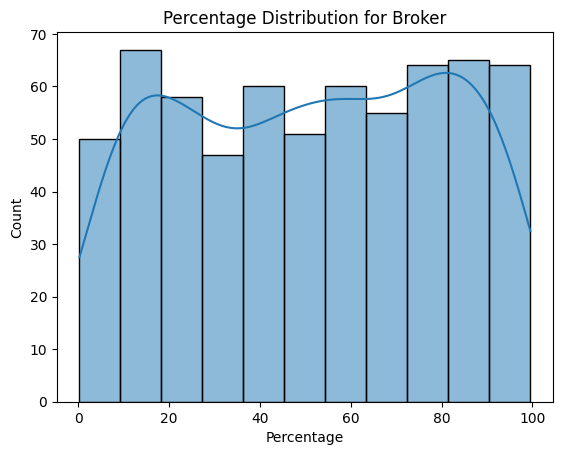

F-statistic: 5.1256, p-value: 0.0061


In [14]:
# Load dataset
df = pd.read_parquet(data_dir + "conversion.parquet")

# Define groups
groups = {
    "Insurer": df.loc[df["sector"] == "Insurer", "percentage"],
    "Agent": df.loc[df["sector"] == "Agent", "percentage"],
    "Broker": df.loc[df["sector"] == "Broker", "percentage"]
}

# Plot histograms for each group
for name, data in groups.items():
    sns.histplot(data, kde=True)
    plt.title(f"Percentage Distribution for {name}")
    plt.xlabel("Percentage")
    plt.ylabel("Count")
    plt.show()

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups.values())
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

In [15]:
model = ols("percentage ~ C(sector)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq     df         F  PR(>F)
C(sector)    8562.009294    2.0  5.125639  0.0061
Residual   832708.206028  997.0       NaN     NaN


In [16]:
tukey = pairwise_tukeyhsd(endog=df["percentage"], groups=df["sector"], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
 Agent  Broker   8.5302  0.004  2.2745 14.7859   True
 Agent Insurer   7.1557 0.0563 -0.1489 14.4604  False
Broker Insurer  -1.3744 0.8183 -6.7206  3.9717  False
-----------------------------------------------------


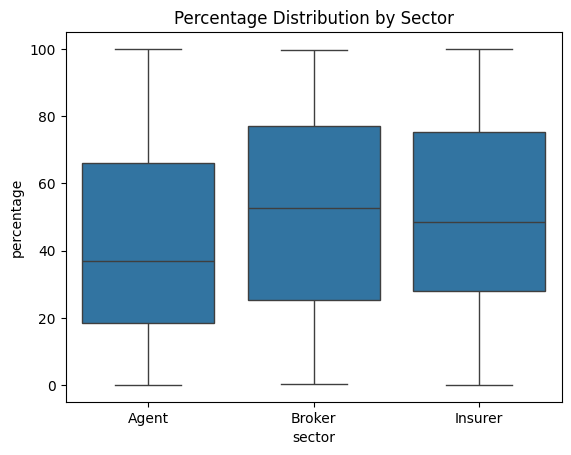

In [17]:
sns.boxplot(x="sector", y="percentage", data=df)
plt.title("Percentage Distribution by Sector")
plt.show()

C:\Users\Blanc\AppData\Local\Temp\ipykernel_19044\1813666654.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby("sector")["percentage"].mean()
C:\Users\Blanc\AppData\Local\Temp\ipykernel_19044\1813666654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = df.groupby("sector")["percentage"].std()
C:\Users\Blanc\AppData\Local\Temp\ipykernel_19044\1813666654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

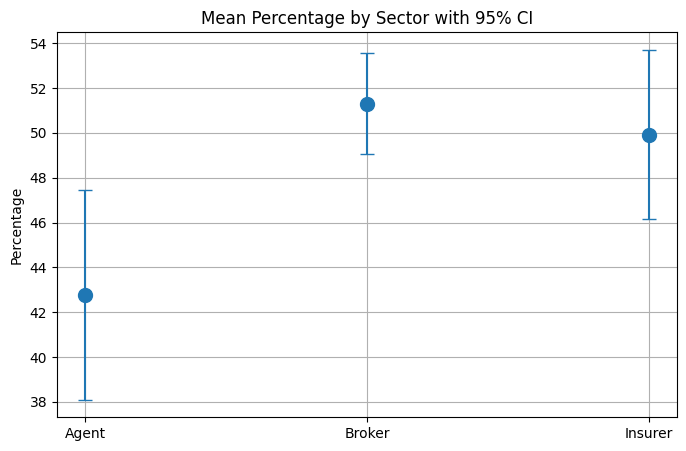

In [18]:
# --- Calculate means and 95% CI ---
means = df.groupby("sector")["percentage"].mean()
stds = df.groupby("sector")["percentage"].std()
ns = df.groupby("sector")["percentage"].count()
ci95 = 1.96 * stds / np.sqrt(ns)

# --- Plot ---
plt.figure(figsize=(8,5))
plt.errorbar(means.index, means.values, yerr=ci95.values, fmt='o', capsize=5, markersize=10)
plt.ylabel("Percentage")
plt.title("Mean Percentage by Sector with 95% CI")
plt.grid(True)
plt.show()